In [1]:
import Pkg

Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("StatsPlots")

   Updating registry at `C:\Users\yancf\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [3]:
using CSV
using DataFrames
using Plots
using StatsPlots

In [4]:
df = Array{DataFrame}(undef,2)
df[1] = DataFrames.DataFrame(CSV.File("./src/data/mergesort/Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz.csv"))
df[2] = DataFrames.DataFrame(CSV.File("./src/data/mergesort/AMD FX(tm)-8350 Eight-Core Processor.csv"))

,Length,Elapsed Time,L1 Cache miss,L2 Cache miss,Num of instructions
,Int64,Float64,Int64,Int64,Int64
1,2048,1.01,1117,80,4746907
2,2176,1.083,2101,83,5106764
3,2304,0.659,1272,75,5458016
4,2432,0.885,1363,72,5809578
5,2560,0.971,1318,62,6155170
6,2688,0.798,1423,65,6506588
7,2816,0.845,1322,73,6852171
8,2944,1.246,1606,166,7197781
9,3072,0.925,1357,90,7537513


In [5]:
function GenericPlot(dfs::Array{DataFrame}, xlabel::String, ylabel::String, label::Array{String})
    p = plot(dfs[1][!, xlabel], dfs[1][!, ylabel], xlabel=xlabel, ylabel=ylabel, label = label[1]) 

    for i = 2:length(dfs)
        plot!(dfs[i][!, xlabel], dfs[i][!, ylabel], xlabel=xlabel, ylabel=ylabel, label = label[i])
    end

    p
end

GenericPlot (generic function with 1 method)

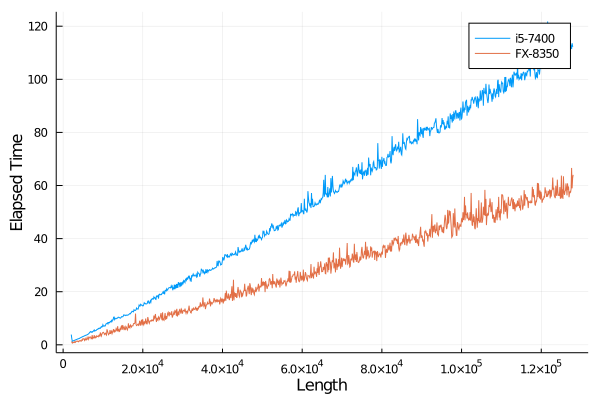

In [6]:
GenericPlot(df, "Length", "Elapsed Time", ["i5-7400", "FX-8350"])

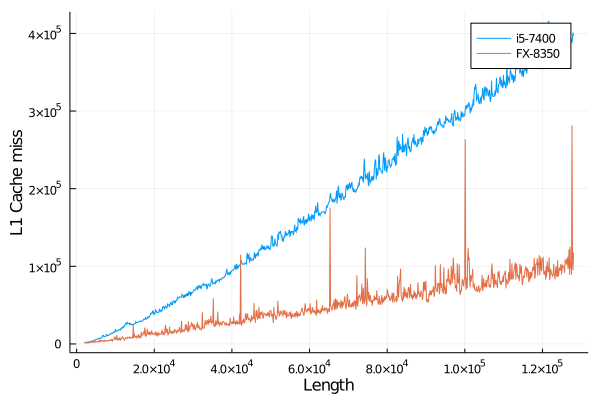

In [7]:
GenericPlot(df, "Length", "L1 Cache miss", ["i5-7400", "FX-8350"])

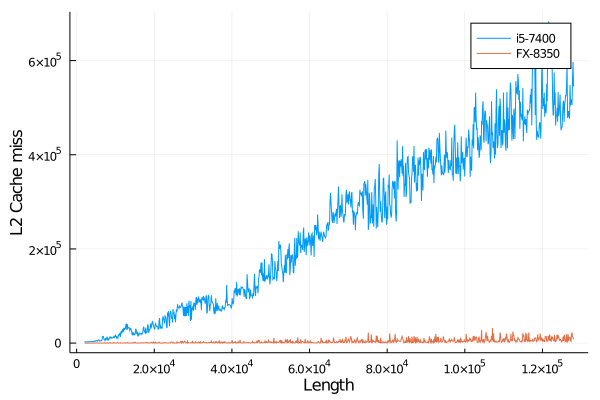

In [8]:
GenericPlot(df, "Length", "L2 Cache miss", ["i5-7400", "FX-8350"])

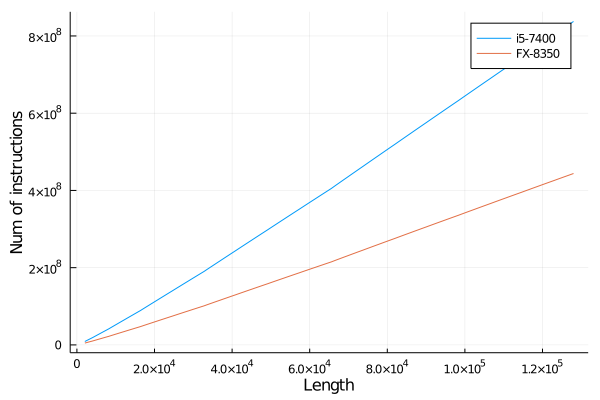

In [9]:
GenericPlot(df, "Length", "Num of instructions", ["i5-7400", "FX-8350"])